# Potential Module Tutorial

This tutorial will show you how to use the potential module to load nextnano++ files. It extracts interpolating functions for potentials as well as electric fields. We can use the interpolating objects to predict the potential at a specific location when a certain combination of gate voltages is applied.

## 1. Load the relevant module

The file nextnano_3D takes in a folder of original nextnano++ files, which contains potentials when different gate voltages are applied. It reshapes the original potential files into 3D arrays, and then slices a specific x-y plane of potentials. This 2D slice of potentials is used to construct interpolating functions of potentials and electric fields in this plane.

x and y coordinates in the original files are stored in a GridParmeters object.

In [1]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()))

import qudipy.potential.nextnano_3D as nano
from qudipy.potential.gridparams import GridParameters

import numpy as np
import matplotlib.pyplot as plt

## 2. Enter information for interpolation (requires user inputs)

We need to specify the name of the folder that contains the nextnano++ files, gate voltages applied, and the z coordinate of the x-y plane.

In [2]:
# Enter the name of the folder
folder = '../qudipy/potential/nextnanoSims_Small'

# Enter voltages of each gate, add/remove lists named as Vx according to the number of gates
V1 = [0.1]
V2 = [0.2]
V3 = [0.2]
V4 = [0.2, 0.22, 0.24, 0.25, 0.26]
V5 = [0.1]
# Put all gate voltages in a list, add/remove Vx to the list accordingly
voltages = [V1, V2, V3, V4, V5]

# Enter the z coordinate of the x-y plane
z = -1

## 3. Store x and y coordinates in a GridParameters object

In [3]:
# Put all the potential data in a list, where each element is a list of 3 elements: 
# a list of the gate voltages, a list of potentials, and a tuple of x and y coordinates
potentialL = nano.import_folder(folder)
coord = potentialL[0][2]
X = coord[0]
Y = coord[1]

# Construct a GridParameters object
coord_grid = GridParameters(X,Y)

## 4. Interpolate the potentials as a function of gate voltages and position

### 4.1 Obtain the interpolating function

In [4]:
potentialL = nano.import_folder(folder)
potentialND = nano.group_2D_potential(potentialL, voltages, coord, -1, "potential")

# interpolating object of the potential
potential_interp = nano.interp(potentialND, voltages, coord)

### 4.2 Enter gate voltages and x/y coordinates for potential prediction (requires user inputs)

We need to specify the position as well as the gate voltages at which we want to make a prediction.

In [5]:
# Enter voltage of each gate(must be selected from the corresponding list if only one element is in the list)
# add/remove lists named as vx according to the number of gates
v1 = 0.1
v2 = 0.2
v3 = 0.2
v4 = 0.2
v5 = 0.1
# Put all gate voltages in a list, add/remove Vx to the list accordingly
volt = [v1, v2, v3, v4, v5]

# Enter the x coordinate
x = 1.0

# Enter the y coordinate
y = 1.0

### 4.3 Predict the potential using the interpolating function

In [6]:
input_L_pre = []
for i in range(len(voltages)):
    if len(voltages[i])>1:
        input_L_pre.append(volt[i])
input_L = input_L_pre + [x,y]
potential_result = potential_interp(input_L)
print(potential_result)

[2.17111444]


## 5. Interpolate the electric fields as a function of gate voltages and position

We can also find the electric fields at the position specified above when a specific combination of gate voltages is applied.

In [7]:
potentialL = nano.import_folder(folder)
fieldND = nano.group_2D_potential(potentialL, voltages, coord, -1, "field")

# interpolating object of the field
field_interp = nano.interp(fieldND, voltages, coord)
field_result = field_interp(input_L)
print(field_result)

[0.00311171]


## 6. Visualize the interpolating objects

We can visualize the interpolating objects by ploting the potentials/electric fields predicted along x-axis or y-axis. The horizontal axis of the plot corresponds to the position, while the vertical axis corresponds to potential or field.

Suppose the gate voltages applied are the same as above, i.e. [0.1, 0.2, 0.2, 0.2, 0.1].

### 6.1 Enter coordinates specifying the slice we want to visualize (requires user inputs)

If we want to plot a 1D slice along the x axis, we need to specify the y value of the slice and the range of x values we want to plot.

Similarly, if we want to plot a 1D slice along the y axis, we need to specify the x value of the slice and the range of y values we want to plot.

In [8]:
# 1D slice along the x axis
y_slice = 1.0
X_range = np.linspace(min(X),max(X),500)

# 1D slice along the y axis
x_slice = 1.0
Y_range = np.linspace(min(Y),max(Y),500)

### 6.2 Plotting the interpolating function of 1D slices

We can plot the interpolating functions of both the potentials and the electric fields on 1D slices along x-axis or along y-axis.

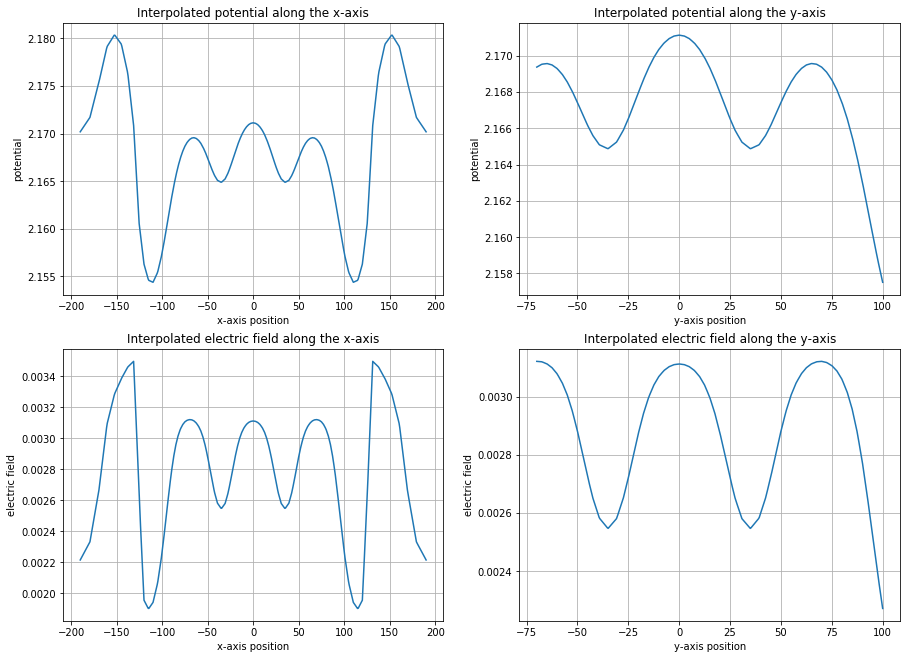

In [9]:
# TODO: units on the plot

f = plt.figure(figsize=(15,11))
ax = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 = f.add_subplot(223)
ax4 = f.add_subplot(224)

# potential along x-axis
potential_x = [potential_interp(input_L_pre+ [i, y_slice]) for i in X_range]
ax.plot(X_range, potential_x)
ax.set(xlabel='x-axis position', ylabel='potential',
       title='Interpolated potential along the x-axis')
ax.grid()

# potential along y-axis
potential_y = [potential_interp(input_L_pre+ [i, x_slice]) for i in Y_range]
ax2.plot(Y_range, potential_y)
ax2.set(xlabel='y-axis position', ylabel='potential',
       title='Interpolated potential along the y-axis')
ax2.grid()

# electric field along x-axis
field_x = [field_interp(input_L_pre+ [i, y_slice]) for i in X_range]
ax3.plot(X_range, field_x)
ax3.set(xlabel='x-axis position', ylabel='electric field',
       title='Interpolated electric field along the x-axis')
ax3.grid()

# electric field along y-axis
field_y = [field_interp(input_L_pre+ [i, x_slice]) for i in Y_range]
ax4.plot(Y_range, field_y)
ax4.set(xlabel='y-axis position', ylabel='electric field',
       title='Interpolated electric field along the y-axis')
ax4.grid()